In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib import ticker
import numpy as np
import math

In [2]:
my_data_total = pd.read_csv("Copia de P11_v03.csv")
my_data_total
my_data_1= pd.read_csv('Copia de P11_may06_v03.csv')
my_data_2=pd.read_csv('Copia de P11_may13_v03.csv')
my_data_3=pd.read_csv('Copia_P11_abr11_v03.csv')
my_data_4=pd.read_csv('Copia_P11_abr29_v03.csv')

In [3]:
my_data_total["time"] = my_data_total.index*3
my_data_1["time"] = my_data_1.index*3
my_data_2["time"] = my_data_2.index*3
my_data_3["time"] = my_data_3.index*3
my_data_4["time"] = my_data_4.index*3

In [4]:
def distance(x, y, z):
    return math.sqrt(x**2 + y**2 + z**2)

my_data_total['Distancia'] = my_data_total.apply(lambda row: distance(row['Des_x'], row['Des_y'], row['Des_z']), axis=1)

my_data_total['Distancia'] 

0        0.361962
1        0.199972
2        0.132541
3        0.101688
4        0.092337
           ...   
13798    0.084877
13799    0.060427
13800    0.016522
13801    0.013444
13802    0.020270
Name: Distancia, Length: 13803, dtype: float64

In [5]:
# Filtramos solo las columnas numéricas para estandarizar
numeric_cols = my_data_total.select_dtypes(include=['number']).columns

# Estandarización de las columnas numéricas
scaler = StandardScaler()
my_data_normalized = pd.DataFrame(scaler.fit_transform(my_data_total[numeric_cols]), columns=numeric_cols)

# Contar cruces por cero para cada columna
cross_zero_counts = {}
for col in my_data_normalized.columns:
    # Contar cruces por cero (un cambio de signo entre valores consecutivos)
    cross_zero_counts[col] = ((my_data_normalized[col].shift(1) * my_data_normalized[col]) < 0).sum()

# Convertir el resultado en un DataFrame
df = pd.DataFrame(list(cross_zero_counts.items()), columns=['Column', 'Zero_Crossings'])

# Mostrar el resultado
df


,Column,Zero_Crossings
0,Veloc,2825
1,Acele,4028
2,Des_x,3451
3,Des_y,2845
4,Des_z,2043
5,Presn,3134
6,VelPr,2634
7,AcePr,4630
8,F5EEX,1700
9,F6EES,1694


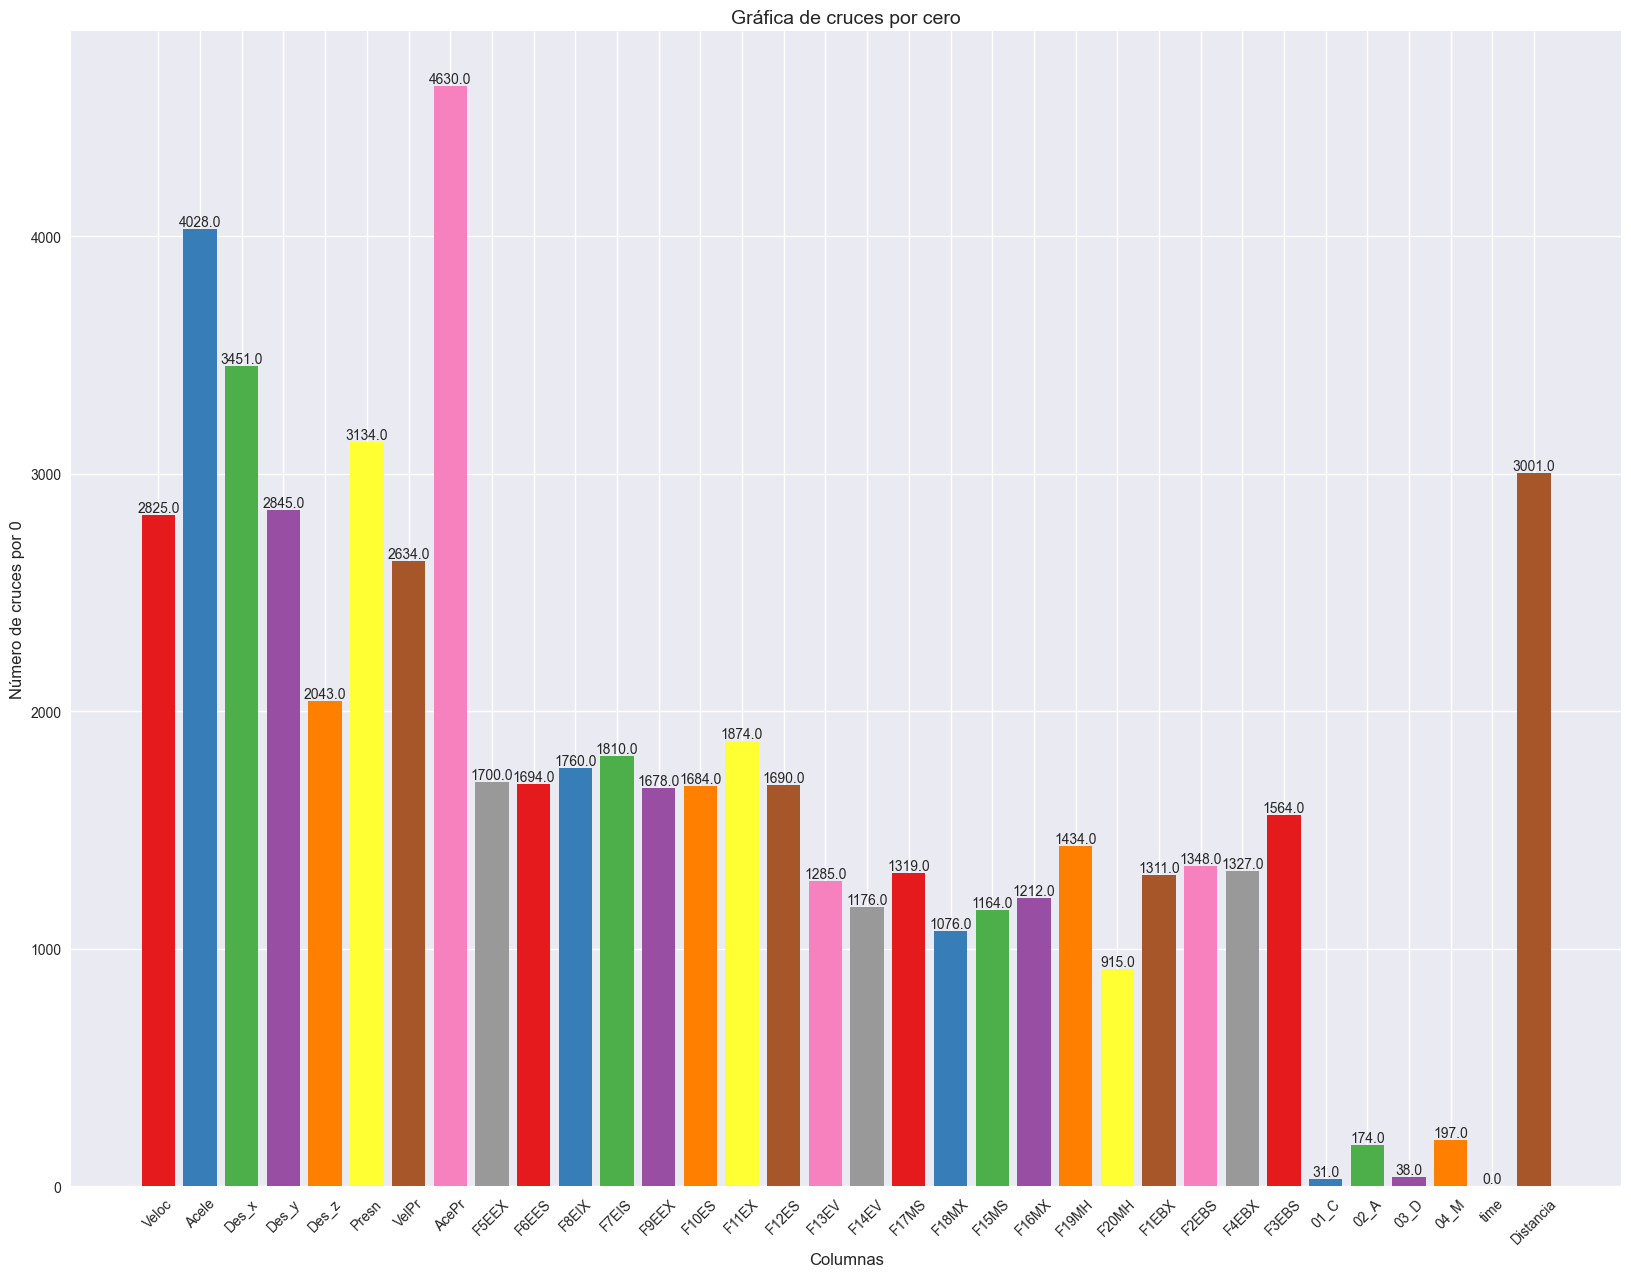

In [6]:
plt.figure(figsize=(20, 15))

# Crear la gráfica de barras
plt.style.use('seaborn-v0_8')  
# Gráfica de barras
colors = plt.get_cmap("Set1").colors  # Usamos la paleta Set2 para colores suaves y equilibrados

bars = plt.bar(df['Column'], df['Zero_Crossings'], color=colors[:len(df)])
# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Número de cruces por 0", fontsize=12)
plt.title("Gráfica de cruces por cero", fontsize=14)

# Mostrar el valor encima de cada barra
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}',
        ha='center', va='bottom'
    )

plt.show()

/var/folders/zc/0810pbdx27g4bxf79h2cbnf40000gn/T/ipykernel_33736/1111707214.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_sorted['Column'], rotation=45, ha='right')


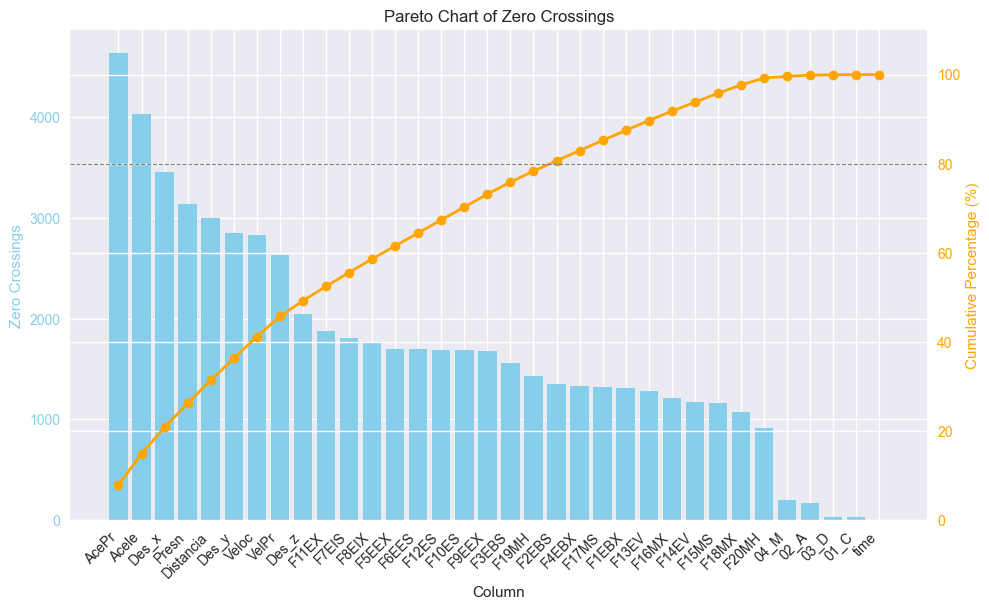

In [7]:
# Ordenar los datos en orden descendente por 'Zero_Crossings'
df_sorted = df.sort_values(by='Zero_Crossings', ascending=False).reset_index(drop=True)

# Calcular el porcentaje acumulativo
df_sorted['Cumulative_Percentage'] = df_sorted['Zero_Crossings'].cumsum() / df_sorted['Zero_Crossings'].sum() * 100

# Crear la gráfica de Pareto
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar las barras de conteo de cruces por cero
bars = ax1.bar(df_sorted['Column'], df_sorted['Zero_Crossings'], color='skyblue', label='Zero Crossings')
ax1.set_xlabel('Column')
ax1.set_ylabel('Zero Crossings', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Rotar las etiquetas del eje X
ax1.set_xticklabels(df_sorted['Column'], rotation=45, ha='right')

# Crear un segundo eje Y para la línea de porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_sorted['Column'], df_sorted['Cumulative_Percentage'], color='orange', marker='o', linestyle='-', linewidth=2, label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim([0, 110])  # Asegura que el límite superior permita que la línea llegue hasta 100%

# Agregar línea de referencia en 80%
ax2.axhline(80, color='grey', linestyle='--', linewidth=0.8)

# Mostrar leyendas
fig.tight_layout()
plt.title('Pareto Chart of Zero Crossings')
plt.show()


In [8]:
# Filtramos solo las columnas numéricas para estandarizar
numeric_cols = my_data_total.select_dtypes(include=['number']).columns

# Estandarización de las columnas numéricas
my_data_normalized = my_data_total

## Contar cruces por cero para cada columna
#cross_zero_counts = {}
#for col in my_data_normalized.columns:
    # Contar cruces por cero (un cambio de signo entre valores consecutivos)
 #   cross_zero_counts[col] = ((my_data_normalized[col].shift(1) * my_data_normalized[col]) < 0).sum()

# Convertir el resultado en un DataFrame
#df_cross_zero_counts = pd.DataFrame(list(cross_zero_counts.items()), columns=['Column', 'Zero_Crossings'])

# Mostrar el resultado
#df_cross_zero_counts

In [9]:
df_sorted = my_data_total.sort_values(by='Distancia', ascending=False).reset_index(drop=True)
df_sorted

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M,time,Distancia
0,1.000000,0.802052,1.000000,0.797107,0.884102,0.589744,0.048780,0.000000,0.543955,0.453409,...,0.541315,0.299595,0.317352,0.166034,-1,-1,-1,1,32085,1.554675
1,1.000000,0.250133,0.380980,1.000000,1.000000,0.504762,0.259259,0.050000,0.437464,0.565389,...,0.483887,0.224189,0.616231,0.413756,-1,1,1,-1,3594,1.464632
2,1.000000,0.945196,0.949546,1.000000,0.244700,0.707071,0.322034,0.428571,0.285430,0.321463,...,0.509595,0.374082,0.271918,0.311937,-1,-1,-1,1,25218,1.400541
3,1.000000,0.492607,0.639487,1.000000,0.714479,0.534722,0.365385,0.586207,0.361554,0.486026,...,0.520837,0.680049,0.355274,0.485793,-1,-1,-1,1,29754,1.385433
4,0.954793,1.000000,1.000000,0.895690,0.239749,0.434343,0.389831,0.619048,0.273294,0.275931,...,0.555102,0.328230,0.267046,0.317183,-1,-1,-1,1,25215,1.363723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13798,0.000188,0.002119,0.001865,0.004608,0.010121,0.500000,0.000000,0.000000,0.462101,0.436339,...,0.190431,0.683430,0.310377,0.207045,-1,-1,-1,-1,37503,0.011276
13799,0.000210,0.006323,0.000069,0.008468,0.006679,0.466667,0.600000,0.086957,0.230274,0.273769,...,0.658815,0.462435,0.292960,0.347754,-1,-1,-1,1,35604,0.010786
13800,0.000000,0.002784,0.008998,0.001501,0.005533,0.496454,0.018868,0.043478,0.361097,0.340241,...,0.243588,0.735981,0.309682,0.280385,-1,-1,-1,-1,20646,0.010669
13801,0.000000,0.002259,0.006554,0.002963,0.005763,0.393939,0.000000,0.000000,0.624501,0.397212,...,0.432051,0.729047,0.423430,0.621224,-1,-1,-1,-1,24312,0.009217


In [10]:
my_data_total['01_C']= my_data_total['01_C'].replace({-1:0})
my_data_total['02_A']= my_data_total['02_A'].replace({-1:0})
my_data_total['03_D']= my_data_total['03_D'].replace({-1:0})
my_data_total['04_M']= my_data_total['04_M'].replace({-1:0})

In [11]:
ojos=my_data_total[['F5EEX','F6EES','F7EIS','F8EIX','F9EEX','F10ES','F11EX','F12ES','F13EV','F14EV']]
cejas=my_data_total[['F1EBX','F2EBS','F3EBS','F4EBX']]
boc= my_data_total[['F15MS','F16MX','F17MS','F18MX','F19MH','F20MH']]

In [12]:
# Filtramos solo las columnas numéricas para estandarizar
numeric_cols = ojos.select_dtypes(include=['number']).columns

# Estandarización de las columnas numéricas
#scaler = StandardScaler()
#my_data_normalized = pd.DataFrame(scaler.fit_transform(my_data[numeric_cols]), columns=numeric_cols)

# Contar cruces por cero para cada columna
cross_zero_counts = {}
for col in ojos.columns:
    # Contar cruces por cero (un cambio de signo entre valores consecutivos)
    cross_zero_counts[col] = abs(ojos[col].sum())

# Convertir el resultado en un DataFrame
df = pd.DataFrame(list(cross_zero_counts.items()), columns=['Column', 'Zero_Crossings'])

# Mostrar el resultado
df

,Column,Zero_Crossings
0,F5EEX,6044.998024
1,F6EES,6236.541586
2,F7EIS,5739.293014
3,F8EIX,6176.272395
4,F9EEX,6197.936149
5,F10ES,6678.737255
6,F11EX,6318.977065
7,F12ES,6489.326291
8,F13EV,6350.512425
9,F14EV,5975.378839


In [13]:
df.set_index('Column')

,Zero_Crossings
Column,
F5EEX,6044.998024
F6EES,6236.541586
F7EIS,5739.293014
F8EIX,6176.272395
F9EEX,6197.936149
F10ES,6678.737255
F11EX,6318.977065
F12ES,6489.326291
F13EV,6350.512425


AQUI GRAFICO

/var/folders/zc/0810pbdx27g4bxf79h2cbnf40000gn/T/ipykernel_33736/808912244.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_sorted['Column'], rotation=45, ha='right')


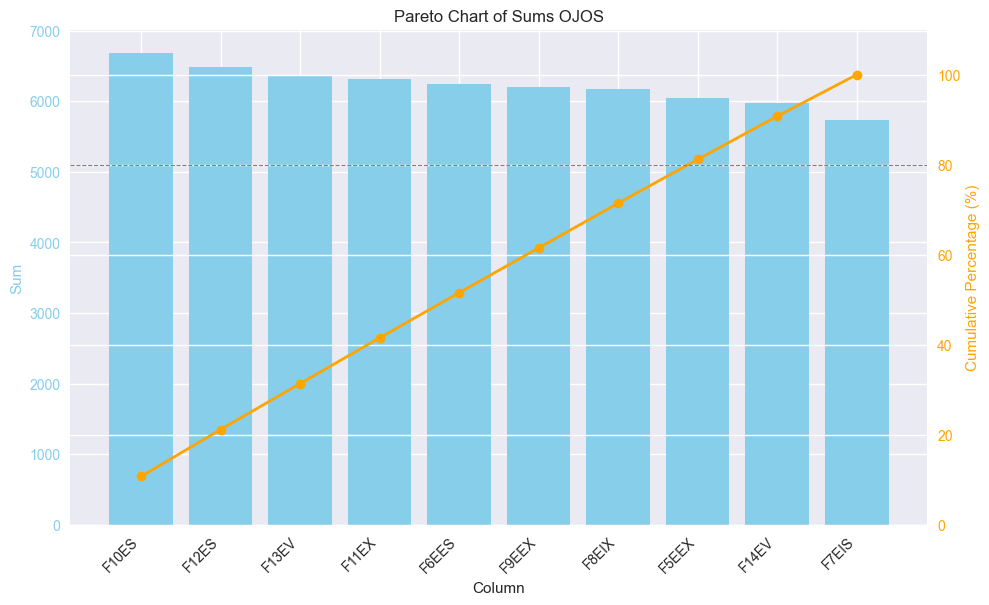

In [14]:
# Ordenar los datos en orden descendente por 'Zero_Crossings'
df_sorted = df.sort_values(by='Zero_Crossings', ascending=False).reset_index(drop=True)

# Calcular el porcentaje acumulativo
df_sorted['Cumulative_Percentage'] = df_sorted['Zero_Crossings'].cumsum() / df_sorted['Zero_Crossings'].sum() * 100

# Crear la gráfica de Pareto
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar las barras de conteo de cruces por cero
bars = ax1.bar(df_sorted['Column'], df_sorted['Zero_Crossings'], color='skyblue', label='Zero Crossings')
ax1.set_xlabel('Column')
ax1.set_ylabel('Sum', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Rotar las etiquetas del eje X
ax1.set_xticklabels(df_sorted['Column'], rotation=45, ha='right')

# Crear un segundo eje Y para la línea de porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_sorted['Column'], df_sorted['Cumulative_Percentage'], color='orange', marker='o', linestyle='-', linewidth=2, label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim([0, 110])  # Asegura que el límite superior permita que la línea llegue hasta 100%

# Agregar línea de referencia en 80%
ax2.axhline(80, color='grey', linestyle='--', linewidth=0.8)

# Mostrar leyendas
fig.tight_layout()
plt.title('Pareto Chart of Sums OJOS')
plt.show()

<p></p>

AQUI ES LO BUENOOOOOOOO¡¡¡¡

/var/folders/zc/0810pbdx27g4bxf79h2cbnf40000gn/T/ipykernel_33736/1674453675.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_sorted['Column'], rotation=45, ha='right')


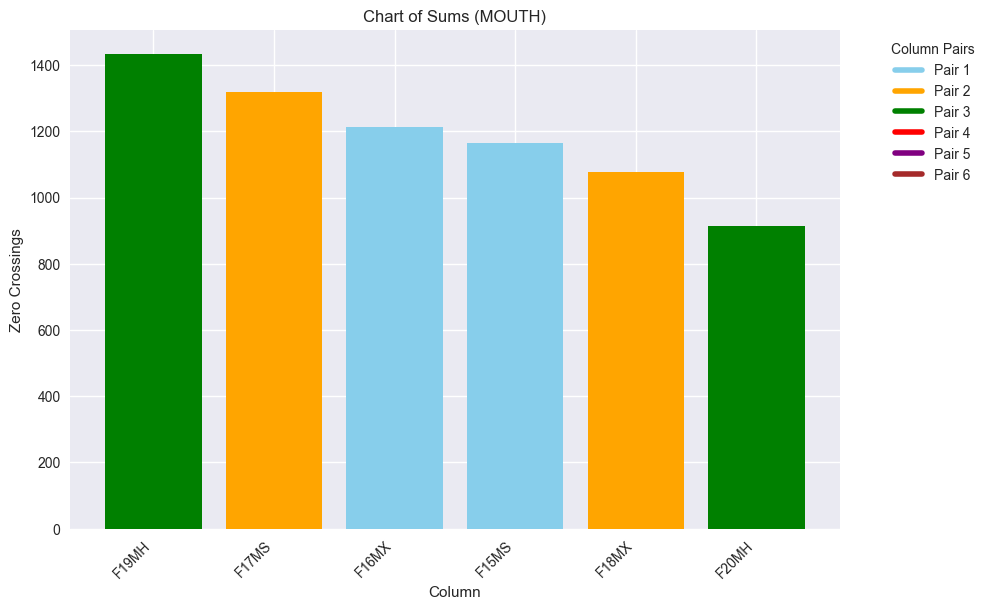

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Estandarización de las columnas numéricas
numeric_cols = boc.select_dtypes(include=['number']).columns
scaler = StandardScaler()
boc_normalized = pd.DataFrame(scaler.fit_transform(boc[numeric_cols]), columns=numeric_cols)

# Contar cruces por cero para cada columna
cross_zero_counts = {}
for col in boc_normalized.columns:
    cross_zero_counts[col] = ((boc_normalized[col].shift(1) * boc_normalized[col]) < 0).sum()

# Convertir el resultado en un DataFrame
df = pd.DataFrame(list(cross_zero_counts.items()), columns=['Column', 'Zero_Crossings'])
df = df.set_index('Column')

# Ordenar los datos en orden descendente por 'Zero_Crossings'
df_sorted = df.sort_values(by='Zero_Crossings', ascending=False).reset_index()

# Calcular el porcentaje acumulativo
df_sorted['Cumulative_Percentage'] = df_sorted['Zero_Crossings'].cumsum() / df_sorted['Zero_Crossings'].sum() * 100


# Asignar colores para los pares de columnas
unique_colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown']
color_map = {}
for i, col in enumerate(boc.columns):
    color_map[col] = unique_colors[i // 2 % len(unique_colors)]  # Asignar un color por cada par

# Crear la gráfica de Pareto
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar las barras de conteo de cruces por cero
colors = [color_map[col] for col in df_sorted['Column']]
bars = ax1.bar(df_sorted['Column'], df_sorted['Zero_Crossings'], color=colors)
ax1.set_xlabel('Column')
ax1.set_ylabel('Zero Crossings')
ax1.tick_params(axis='y')

# Rotar las etiquetas del eje X
ax1.set_xticklabels(df_sorted['Column'], rotation=45, ha='right')


# Mostrar leyendas de colores para los pares
legend_patches = [plt.Line2D([0], [0], color=unique_colors[i], lw=4, label=f'Pair {i+1}') for i in range(len(unique_colors))]
ax1.legend(handles=legend_patches, title='Column Pairs', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño y mostrar la gráfica
fig.tight_layout()
plt.title('Chart of Sums (MOUTH)')
plt.show()


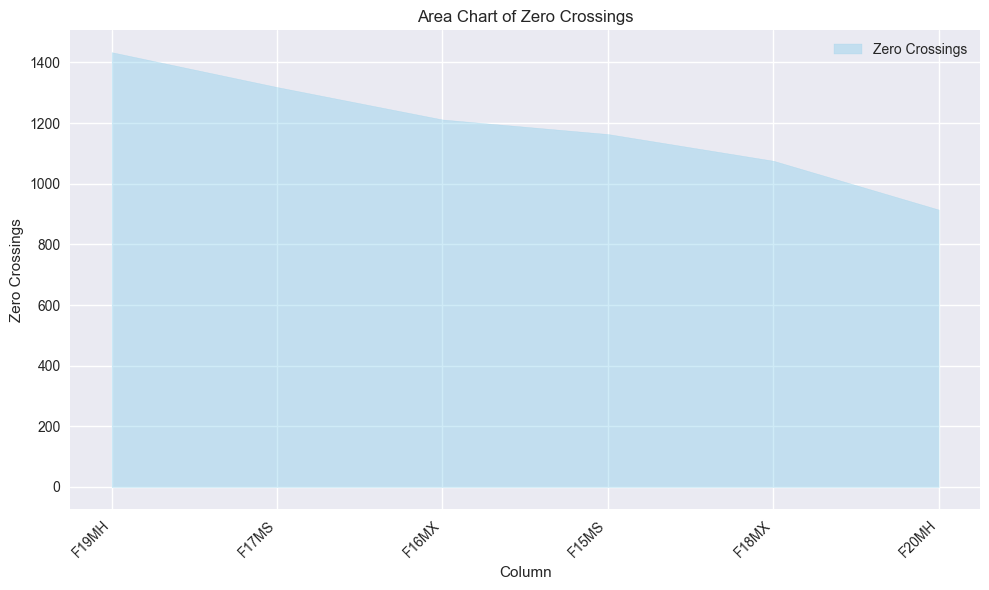

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Supongamos que `boc` es tu DataFrame de entrada
# Estandarización de las columnas numéricas
numeric_cols = boc.select_dtypes(include=['number']).columns
scaler = StandardScaler()
boc_normalized = pd.DataFrame(scaler.fit_transform(boc[numeric_cols]), columns=numeric_cols)

# Contar cruces por cero para cada columna
cross_zero_counts = {}
for col in boc_normalized.columns:
    cross_zero_counts[col] = ((boc_normalized[col].shift(1) * boc_normalized[col]) < 0).sum()

# Convertir el resultado en un DataFrame
df = pd.DataFrame(list(cross_zero_counts.items()), columns=['Column', 'Zero_Crossings'])
df = df.set_index('Column')

# Ordenar los datos en orden descendente por 'Zero_Crossings'
df_sorted = df.sort_values(by='Zero_Crossings', ascending=False).reset_index()

# Calcular el porcentaje acumulativo
df_sorted['Cumulative_Percentage'] = df_sorted['Zero_Crossings'].cumsum() / df_sorted['Zero_Crossings'].sum() * 100

# Crear el gráfico de área
plt.figure(figsize=(10, 6))
plt.fill_between(
    df_sorted['Column'],
    df_sorted['Zero_Crossings'],
    color="skyblue",
    alpha=0.4,
    label="Zero Crossings"
)

# Configuración de ejes y leyendas
plt.xlabel('Column')
plt.ylabel('Zero Crossings')
plt.title('Area Chart of Zero Crossings')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def boca_multiple_sessions(df_sessions):
    """
    Procesa múltiples DataFrames (sesiones) para calcular cruces por cero y generar un gráfico combinado de áreas.
    
    Parameters:
        df_sessions (list): Lista de DataFrames a procesar. Cada uno es una sesión.
        
    Returns:
        fig: Figura combinada de áreas mostrando los cruces por cero para cada sesión.
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = ['skyblue', 'orange', 'green', 'red']  # Colores para las sesiones
    labels = ['Session 1', 'Session 2', 'Session 3', 'Session 4']  # Etiquetas de las sesiones
    
    for idx, dfg in enumerate(df_sessions):
        # Seleccionar columnas específicas
        boc = dfg[['F15MS', 'F16MX', 'F17MS', 'F18MX', 'F19MH', 'F20MH']]
        
        # Estandarización de columnas numéricas
        numeric_cols = boc.select_dtypes(include=['number']).columns
        scaler = StandardScaler()
        boc_normalized = pd.DataFrame(
            scaler.fit_transform(boc[numeric_cols]), 
            columns=numeric_cols
        )
        
        # Contar cruces por cero para cada columna
        cross_zero_counts = {}
        for col in boc_normalized.columns:
            cross_zero_counts[col] = ((boc_normalized[col].shift(1) * boc_normalized[col]) < 0).sum()
        
        # Convertir el resultado en un DataFrame
        df = pd.DataFrame(list(cross_zero_counts.items()), columns=['Column', 'Zero_Crossings'])
        df_sorted = df.sort_values(by='Zero_Crossings', ascending=False).reset_index(drop=True)
        
        # Agregar datos al gráfico
        ax.fill_between(
            df_sorted['Column'],
            df_sorted['Zero_Crossings'],
            color=colors[idx],
            alpha=0.4,
            label=labels[idx]
        )
    
    # Configuración del gráfico combinado
    ax.set_title('Combined Area Chart of Zero Crossings Across Sessions')
    ax.set_xlabel('Column')
    ax.set_ylabel('Zero Crossings')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    plt.tight_layout()
    
    return fig


/var/folders/zc/0810pbdx27g4bxf79h2cbnf40000gn/T/ipykernel_33736/13663173.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_ojos_sorted['Column'], rotation=45, ha='right')


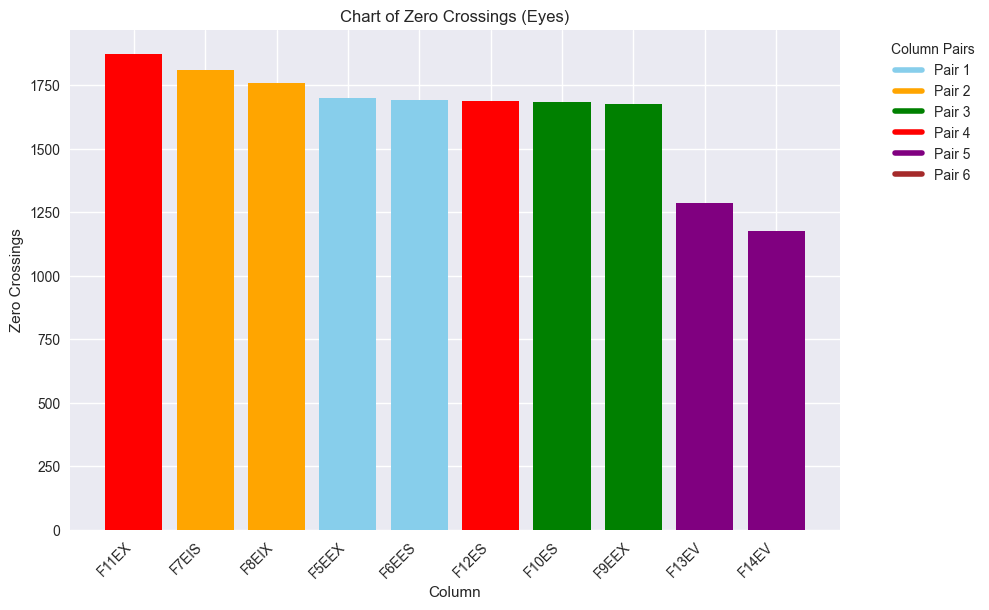

In [16]:
# Filtro de ojos
ojos = my_data_total[['F5EEX', 'F6EES', 'F7EIS', 'F8EIX', 'F9EEX', 'F10ES', 'F11EX', 'F12ES', 'F13EV', 'F14EV']]

# Estandarización de las columnas numéricas
numeric_cols = ojos.select_dtypes(include=['number']).columns
scaler = StandardScaler()
ojos_normalized = pd.DataFrame(scaler.fit_transform(ojos[numeric_cols]), columns=numeric_cols)

# Contar cruces por cero para cada columna
cross_zero_counts = {}
for col in ojos_normalized.columns:
    cross_zero_counts[col] = ((ojos_normalized[col].shift(1) * ojos_normalized[col]) < 0).sum()

# Convertir el resultado en un DataFrame
df_ojos = pd.DataFrame(list(cross_zero_counts.items()), columns=['Column', 'Zero_Crossings'])
df_ojos = df_ojos.set_index('Column')

# Ordenar los datos en orden descendente por 'Zero_Crossings'
df_ojos_sorted = df_ojos.sort_values(by='Zero_Crossings', ascending=False).reset_index()

# Calcular el porcentaje acumulativo
df_ojos_sorted['Cumulative_Percentage'] = df_ojos_sorted['Zero_Crossings'].cumsum() / df_ojos_sorted['Zero_Crossings'].sum() * 100

# Asignar colores para los pares de columnas
unique_colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown']
color_map = {}
for i, col in enumerate(ojos.columns):
    color_map[col] = unique_colors[i // 2 % len(unique_colors)]  # Asignar un color por cada par

# Crear la gráfica de Pareto
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar las barras de conteo de cruces por cero
colors = [color_map[col] for col in df_ojos_sorted['Column']]
bars = ax1.bar(df_ojos_sorted['Column'], df_ojos_sorted['Zero_Crossings'], color=colors)
ax1.set_xlabel('Column')
ax1.set_ylabel('Zero Crossings')
ax1.tick_params(axis='y')

# Rotar las etiquetas del eje X
ax1.set_xticklabels(df_ojos_sorted['Column'], rotation=45, ha='right')



# Mostrar leyendas de colores para los pares
legend_patches = [plt.Line2D([0], [0], color=unique_colors[i], lw=4, label=f'Pair {i+1}') for i in range(len(unique_colors))]
ax1.legend(handles=legend_patches, title='Column Pairs', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño y mostrar la gráfica
fig.tight_layout()
plt.title('Chart of Zero Crossings (Eyes)')
plt.show()


/var/folders/zc/0810pbdx27g4bxf79h2cbnf40000gn/T/ipykernel_33736/2389609456.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_cejas_sorted['Column'], rotation=45, ha='right')


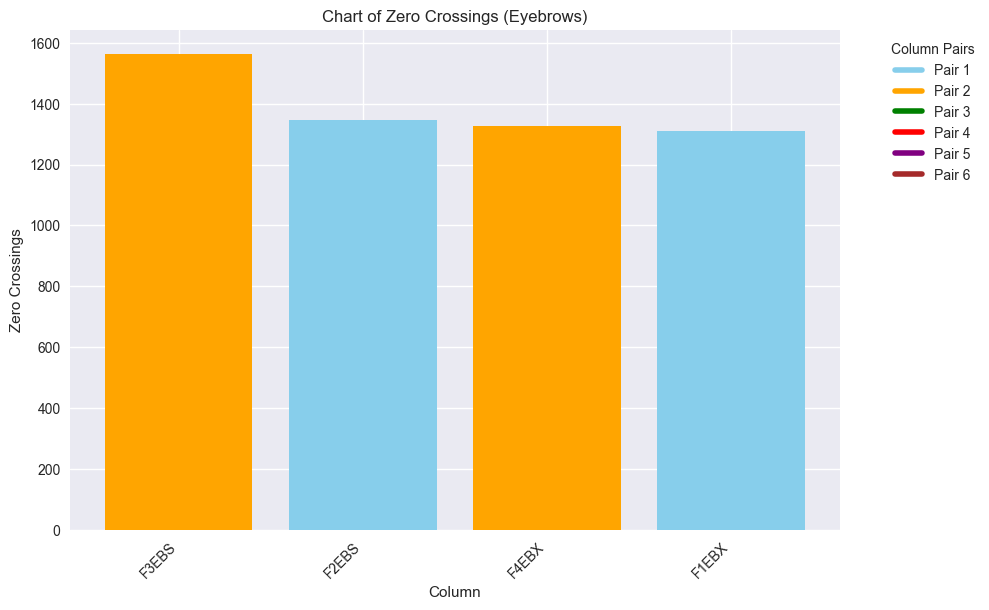

In [17]:
# Filtro de cejas
cejas = my_data_total[['F1EBX', 'F2EBS', 'F3EBS', 'F4EBX']]

# Estandarización de las columnas numéricas
numeric_cols = cejas.select_dtypes(include=['number']).columns
scaler = StandardScaler()
cejas_normalized = pd.DataFrame(scaler.fit_transform(cejas[numeric_cols]), columns=numeric_cols)

# Contar cruces por cero para cada columna
cross_zero_counts = {}
for col in cejas_normalized.columns:
    cross_zero_counts[col] = ((cejas_normalized[col].shift(1) * cejas_normalized[col]) < 0).sum()

# Convertir el resultado en un DataFrame
df_cejas = pd.DataFrame(list(cross_zero_counts.items()), columns=['Column', 'Zero_Crossings'])
df_cejas = df_cejas.set_index('Column')

# Ordenar los datos en orden descendente por 'Zero_Crossings'
df_cejas_sorted = df_cejas.sort_values(by='Zero_Crossings', ascending=False).reset_index()

# Calcular el porcentaje acumulativo
df_cejas_sorted['Cumulative_Percentage'] = df_cejas_sorted['Zero_Crossings'].cumsum() / df_cejas_sorted['Zero_Crossings'].sum() * 100

# Asignar colores para los pares de columnas
unique_colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown']
color_map = {}
for i, col in enumerate(cejas.columns):
    color_map[col] = unique_colors[i // 2 % len(unique_colors)]  # Asignar un color por cada par

# Crear la gráfica de Pareto
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar las barras de conteo de cruces por cero
colors = [color_map[col] for col in df_cejas_sorted['Column']]
bars = ax1.bar(df_cejas_sorted['Column'], df_cejas_sorted['Zero_Crossings'], color=colors)
ax1.set_xlabel('Column')
ax1.set_ylabel('Zero Crossings')
ax1.tick_params(axis='y')

# Rotar las etiquetas del eje X
ax1.set_xticklabels(df_cejas_sorted['Column'], rotation=45, ha='right')


# Mostrar leyendas de colores para los pares
legend_patches = [plt.Line2D([0], [0], color=unique_colors[i], lw=4, label=f'Pair {i+1}') for i in range(len(unique_colors))]
ax1.legend(handles=legend_patches, title='Column Pairs', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño y mostrar la gráfica
fig.tight_layout()
plt.title('Chart of Zero Crossings (Eyebrows)')
plt.show()


In [18]:
my_data_total['F18MX']

0        0.147251
1        0.161878
2        0.151745
3        0.142548
4        0.129735
           ...   
13798    0.231231
13799    0.217374
13800    0.245399
13801    0.238492
13802    0.231341
Name: F18MX, Length: 13803, dtype: float64

In [19]:
derecho = my_data_total[['F1EBX','F4EBX','F5EEX','F8EIX','F14EV','F9EEX','F11EX','F15MS','F19MH','F17MS']]
izquierdo = my_data_total[['F2EBS','F3EBS','F6EES','F7EIS','F13EV','F12ES','F10ES','F16MX','F20MH','F18MX']]

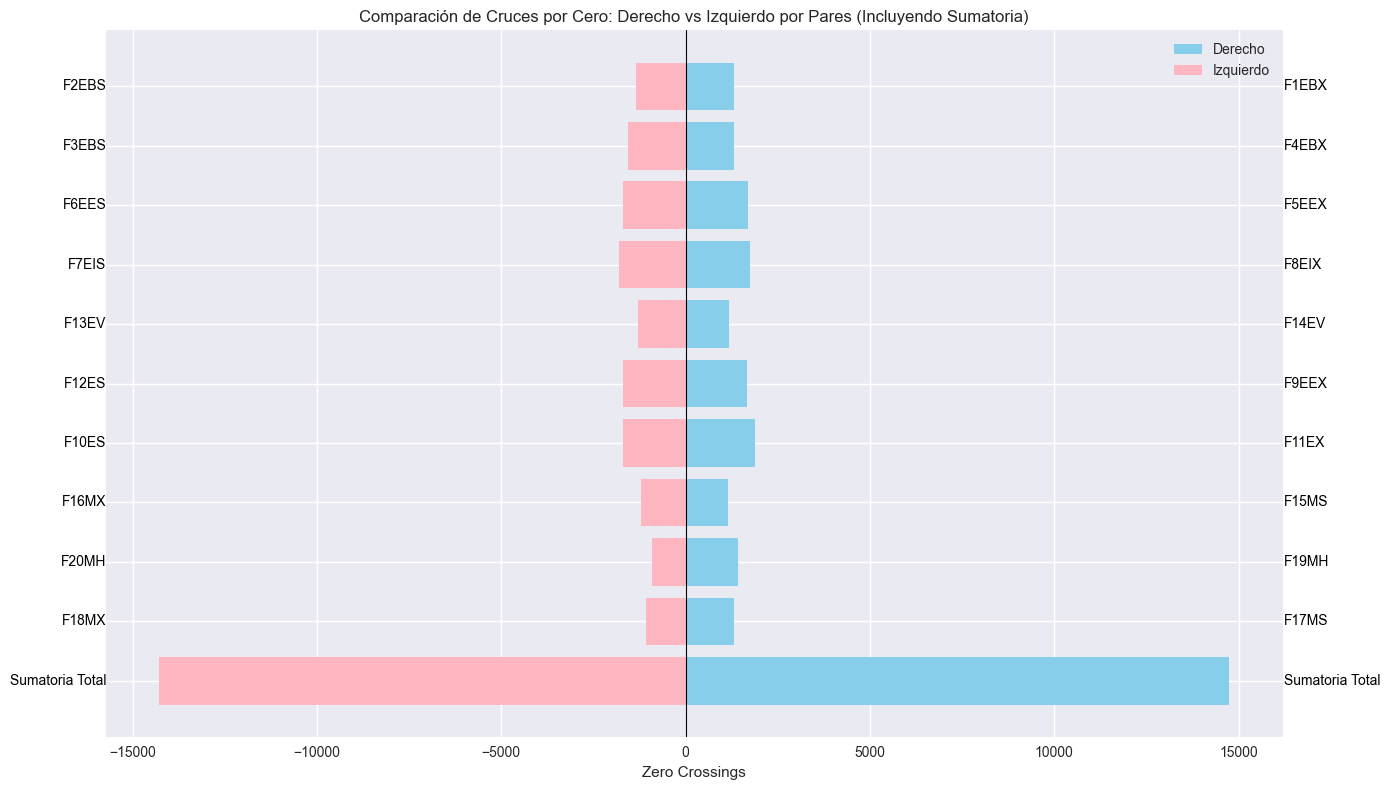

In [20]:
# Filtros para derecho e izquierdo
derecho = my_data_total[['F1EBX', 'F4EBX', 'F5EEX', 'F8EIX', 'F14EV', 'F9EEX', 'F11EX', 'F15MS', 'F19MH', 'F17MS']]
izquierdo = my_data_total[['F2EBS', 'F3EBS', 'F6EES', 'F7EIS', 'F13EV', 'F12ES', 'F10ES', 'F16MX', 'F20MH', 'F18MX']]

# Estandarización de las columnas numéricas
scaler = StandardScaler()
derecho_normalized = pd.DataFrame(scaler.fit_transform(derecho), columns=derecho.columns)
izquierdo_normalized = pd.DataFrame(scaler.fit_transform(izquierdo), columns=izquierdo.columns)

# Contar cruces por cero para cada columna
cross_zero_counts_derecho = [
    ((derecho_normalized[col].shift(1) * derecho_normalized[col]) < 0).sum()
    for col in derecho_normalized.columns
]

cross_zero_counts_izquierdo = [
    ((izquierdo_normalized[col].shift(1) * izquierdo_normalized[col]) < 0).sum()
    for col in izquierdo_normalized.columns
]

# Crear un DataFrame con los valores de los cruces por cero
df_paired = pd.DataFrame({
    'Columnas_Derecho': derecho.columns,
    'Columnas_Izquierdo': izquierdo.columns,
    'Derecho': cross_zero_counts_derecho,
    'Izquierdo': cross_zero_counts_izquierdo
})

# Agregar una fila para las sumatorias totales utilizando pd.concat()
sumatoria_derecho = sum(df_paired['Derecho'])
sumatoria_izquierdo = sum(df_paired['Izquierdo'])
df_sumatoria = pd.DataFrame({
    'Columnas_Derecho': ['Sumatoria Total'],
    'Columnas_Izquierdo': ['Sumatoria Total'],
    'Derecho': [sumatoria_derecho],
    'Izquierdo': [sumatoria_izquierdo]
})
df_paired = pd.concat([df_paired, df_sumatoria], ignore_index=True)

# Crear la gráfica de pirámide
fig, ax = plt.subplots(figsize=(14, 8))

# Posiciones en el eje y (una posición por cada par de columnas más la fila de sumatorias)
y_positions = range(len(df_paired))

# Dibujar las barras horizontales para cada par de columnas y la sumatoria
ax.barh(y_positions, df_paired['Derecho'], color='skyblue', label='Derecho', align='center')
ax.barh(y_positions, -df_paired['Izquierdo'], color='lightpink', label='Izquierdo', align='center')  # Negativo para enfrentar

# Configuración del eje y con etiquetas a ambos lados
ax.set_yticks(y_positions)
ax.set_yticklabels([''] * len(df_paired))  # Ocultamos temporalmente las etiquetas centrales
ax.invert_yaxis()  # Para que las barras más grandes queden en la parte superior

# Etiquetas a la izquierda y derecha de las barras
for i, (col_derecho, col_izquierdo) in enumerate(zip(df_paired['Columnas_Derecho'], df_paired['Columnas_Izquierdo'])):
    ax.text(-max(df_paired['Izquierdo']) * 1.1, i, col_izquierdo, ha='right', va='center', fontsize=10, color='black')  # Etiquetas de izquierdo
    ax.text(max(df_paired['Derecho']) * 1.1, i, col_derecho, ha='left', va='center', fontsize=10, color='black')  # Etiquetas de derecho

# Configuración de etiquetas y leyenda
ax.set_xlabel('Zero Crossings')
ax.set_title('Comparación de Cruces por Cero: Derecho vs Izquierdo por Pares (Incluyendo Sumatoria)')
ax.legend(loc='upper right')

# Línea central para separar los lados
ax.axvline(0, color='black', linewidth=0.8)

# Ajustar diseño y mostrar la gráfica
plt.tight_layout()
plt.show()



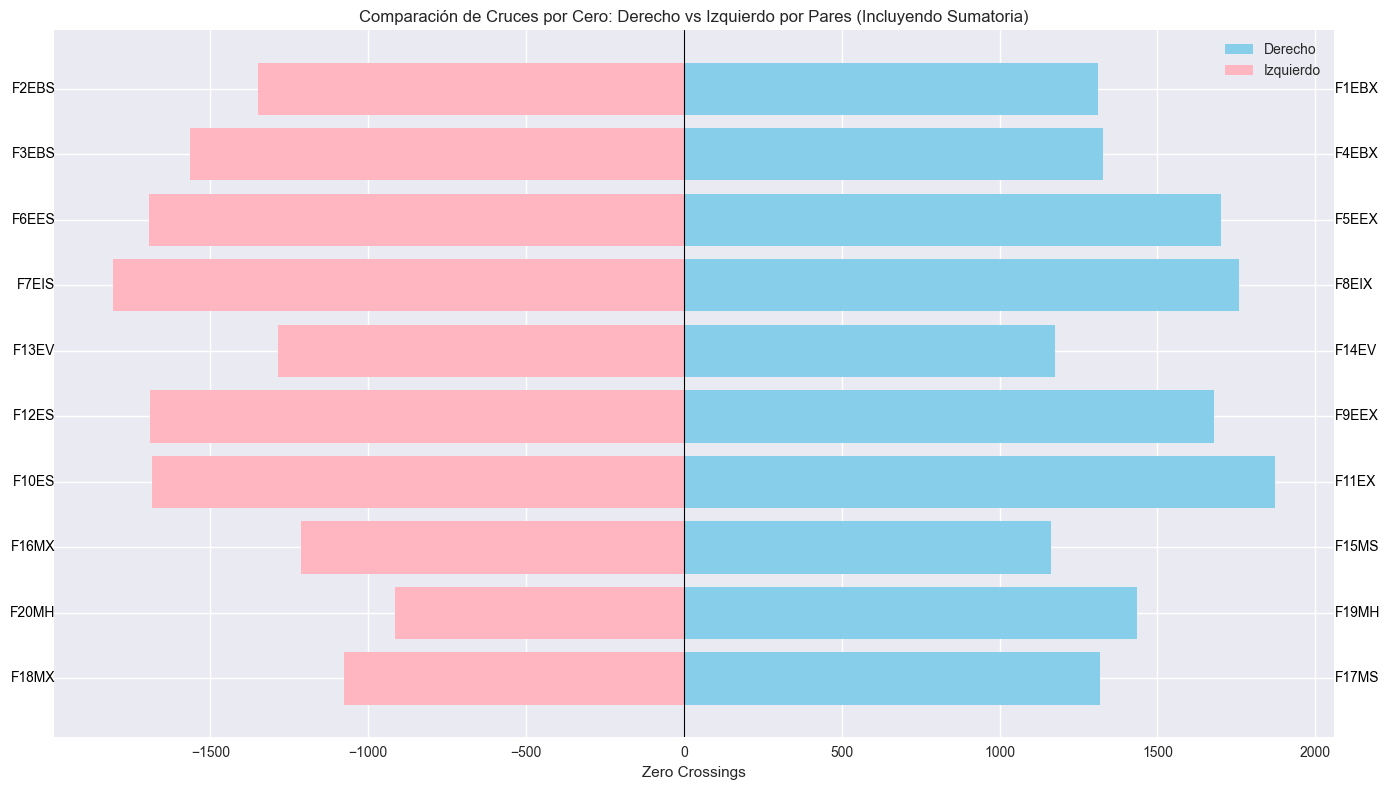

In [21]:
# Filtros para derecho e izquierdo
derecho = my_data_total[['F1EBX', 'F4EBX', 'F5EEX', 'F8EIX', 'F14EV', 'F9EEX', 'F11EX', 'F15MS', 'F19MH', 'F17MS']]
izquierdo = my_data_total[['F2EBS', 'F3EBS', 'F6EES', 'F7EIS', 'F13EV', 'F12ES', 'F10ES', 'F16MX', 'F20MH', 'F18MX']]

# Estandarización de las columnas numéricas
scaler = StandardScaler()
derecho_normalized = pd.DataFrame(scaler.fit_transform(derecho), columns=derecho.columns)
izquierdo_normalized = pd.DataFrame(scaler.fit_transform(izquierdo), columns=izquierdo.columns)

# Contar cruces por cero para cada columna
cross_zero_counts_derecho = [
    ((derecho_normalized[col].shift(1) * derecho_normalized[col]) < 0).sum()
    for col in derecho_normalized.columns
]

cross_zero_counts_izquierdo = [
    ((izquierdo_normalized[col].shift(1) * izquierdo_normalized[col]) < 0).sum()
    for col in izquierdo_normalized.columns
]

# Crear un DataFrame con los valores de los cruces por cero
df_paired = pd.DataFrame({
    'Columnas_Derecho': derecho.columns,
    'Columnas_Izquierdo': izquierdo.columns,
    'Derecho': cross_zero_counts_derecho,
    'Izquierdo': cross_zero_counts_izquierdo
})

# Agregar una fila para las sumatorias totales utilizando pd.concat()
sumatoria_derecho = sum(df_paired['Derecho'])
sumatoria_izquierdo = sum(df_paired['Izquierdo'])
df_sumatoria = pd.DataFrame({
    'Columnas_Derecho': ['Sumatoria Total'],
    'Columnas_Izquierdo': ['Sumatoria Total'],
    'Derecho': [sumatoria_derecho],
    'Izquierdo': [sumatoria_izquierdo]
})
df_paired = pd.concat([df_paired], ignore_index=True)

# Crear la gráfica de pirámide
fig, ax = plt.subplots(figsize=(14, 8))

# Posiciones en el eje y (una posición por cada par de columnas más la fila de sumatorias)
y_positions = range(len(df_paired))

# Dibujar las barras horizontales para cada par de columnas y la sumatoria
ax.barh(y_positions, df_paired['Derecho'], color='skyblue', label='Derecho', align='center')
ax.barh(y_positions, -df_paired['Izquierdo'], color='lightpink', label='Izquierdo', align='center')  # Negativo para enfrentar

# Configuración del eje y con etiquetas a ambos lados
ax.set_yticks(y_positions)
ax.set_yticklabels([''] * len(df_paired))  # Ocultamos temporalmente las etiquetas centrales
ax.invert_yaxis()  # Para que las barras más grandes queden en la parte superior

# Etiquetas a la izquierda y derecha de las barras
for i, (col_derecho, col_izquierdo) in enumerate(zip(df_paired['Columnas_Derecho'], df_paired['Columnas_Izquierdo'])):
    ax.text(-max(df_paired['Izquierdo']) * 1.1, i, col_izquierdo, ha='right', va='center', fontsize=10, color='black')  # Etiquetas de izquierdo
    ax.text(max(df_paired['Derecho']) * 1.1, i, col_derecho, ha='left', va='center', fontsize=10, color='black')  # Etiquetas de derecho

# Configuración de etiquetas y leyenda
ax.set_xlabel('Zero Crossings')
ax.set_title('Comparación de Cruces por Cero: Derecho vs Izquierdo por Pares (Incluyendo Sumatoria)')
ax.legend(loc='upper right')

# Línea central para separar los lados
ax.axvline(0, color='black', linewidth=0.8)

# Ajustar diseño y mostrar la gráfica
plt.tight_layout()
plt.show()


In [22]:
print(f'Sumatoria total lado derecho:{df_sumatoria['Derecho']}')
print(f'Sumatoria total lado izquierdo:{df_sumatoria['Izquierdo']}')


Sumatoria total lado derecho:0    14743
Name: Derecho, dtype: int64
Sumatoria total lado izquierdo:0    14278
Name: Izquierdo, dtype: int64


In [23]:
df_sumatoria['Izquierdo']

0    14278
Name: Izquierdo, dtype: int64

In [26]:
df_sumatoria.drop(columns=)

,Columnas_Derecho,Columnas_Izquierdo,Derecho,Izquierdo
0,Sumatoria Total,Sumatoria Total,14743,14278


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de tener un DataFrame con las columnas necesarias
# Por ejemplo:
# df = pd.read_csv("data.csv")

variables = df.columns
var = st.sidebar.multiselect(label='Columna a graficar vs el tiempo', options=variables)

if var:
    # Gráfico de evolución de las columnas seleccionadas en el tiempo
    st.write(f"Evolución de {', '.join(var)} en el tiempo:")
    for column in var:
        st.line_chart(df[[column, 'time']].set_index('time'))

    # Crear la gráfica de pirámide
    st.write("Comparación de Cruces por Cero")
    fig, ax = plt.subplots(figsize=(19, 17))

    # Posiciones en el eje y (basado en el tiempo)
    y_positions = df['time']

    # Dibujar las barras horizontales para cada columna seleccionada
    for column in var:
        ax.barh(y_positions, df[column], label=f'{column}', align='center')

    # Configuración de etiquetas y leyenda
    ax.set_yticks(y_positions)
    ax.set_yticklabels([''] * len(df['time']))  # Ocultar temporalmente las etiquetas centrales
    ax.set_xlabel('Zero Crossings')
    ax.set_title('Comparación de Cruces por Cero')
    ax.legend(loc='upper right')

    # Línea central para separar los lados
    ax.axvline(0, color='black', linewidth=0.8)

    # Mostrar la gráfica en Streamlit
    st.pyplot(fig)


In [ ]:
if var:
    st.write(f"Evolución de {', '.join(var)} en el tiempo:")
    
    # Crear subplots en un contenedor 2x2
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()  # Aplanar para acceder fácilmente a los subplots

    # Colores diferenciados
    colors = ['blue', 'green', 'red', 'purple']

    # Graficar cada variable
    for i, column in enumerate(var):
        ax = axes[i]
        df_selected = df[['time', column]].set_index('time')
        st.line_chart(df_selected)  # Respetar tu función de gráfica
        
        # Para gráficos estáticos adicionales con Matplotlib (opcional)
        ax.plot(df['time'], df[column], color=colors[i], marker='o')
        ax.set_title(f'{column} vs Tiempo')
        ax.set_xlabel('Tiempo')
        ax.set_ylabel(column)
        ax.grid(True)

    # Ocultar gráficos vacíos si hay menos de 4 selecciones
    for j in range(len(var), 4):
        fig.delaxes(axes[j])

    # Ajustar diseño y mostrar
    plt.tight_layout()
    st.pyplot(fig)